# **Task**

- Importing the necessary libraries for building a convolutional neural network (CNN) and for loading the CIFAR-10 dataset.
- The CIFAR-10 dataset consists of 60,000 32x32 color images in 10 classes, with 6,000 images per class. There are 50,000 training images and 10,000 test images.
- The goal is to build a CNN that can classify these images into their respective classes.
- The model will be built using the Keras API in TensorFlow.
- The model will have several convolutional and pooling layers, followed by a few fully connected layers and a softmax output layer.
- The Adam optimizer will be used for training, and the cross-entropy loss will be used as the loss function.


## **Make sure to change runtime type --> GPU before beginning with the code!**

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import cifar10


- Convert the class labels for both the training and testing sets to one-hot encoded vectors.
- Scale the pixel values of the images in both the training and testing sets to be between 0 and 1.

In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Converting the labels to one-hot encoded vectors
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# Scaling the pixel values to be between 0 and 1
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255


170498071/170498071 [==============================] - 11s 0us/step



## **Define Model**
The model has the following layers:

- A 2D convolutional layer with 32 filters, each with a size of 3x3 pixels, using the ReLU activation function and 'same' padding, and taking an input shape of (32,32,3) (i.e., 32x32 pixel images with 3 color channels).
- A max pooling layer with a pool size of 2x2 pixels.
- A dropout layer that randomly drops 25% of the input units during training to prevent overfitting.
- 2D convolutional layer with 64 filters, each with a size of 3x3 pixels, using the ReLU activation function and 'same' padding.
- Max pooling layer with a pool size of 2x2 pixels.
- Dropout layer that randomly drops 25% of the input units during training.
- 2D convolutional layer with 128 filters, each with a size of 3x3 pixels, using the ReLU activation function and 'same' padding.
- Max pooling layer with a pool size of 2x2 pixels.
- Dropout layer that randomly drops 25% of the input units during training.
- A flatten layer to convert the 2D output from the convolutional layers to a 1D vector.
- A fully connected (dense) layer with 512 neurons and ReLU activation function.
- Dropout layer that randomly drops 50% of the input units during training.
- A final fully connected layer with num_classes neurons and softmax activation function.

In [3]:
model = keras.Sequential(
    [
        layers.Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(32,32,3)),
        layers.MaxPooling2D((2,2)),
        layers.Dropout(0.25),

        layers.Conv2D(64, (3,3), activation='relu', padding='same'),
        layers.MaxPooling2D((2,2)),
        layers.Dropout(0.25),

        layers.Conv2D(128, (3,3), activation='relu', padding='same'),
        layers.MaxPooling2D((2,2)),
        layers.Dropout(0.25),

        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax'),
    ]
)


## **Compile and Train Model**

The model is then compiled with the following parameters:
- Optimizer: "Adam"
- Loss Function: "Categorical Crossentropy"
- Performance Metrics: "Accuracy"



In [11]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


To make sure that the model does not overfit, we can use early stopping!

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=3)

history = model.fit(X_train, y_train, batch_size=64, epochs=50, validation_split=0.1, callbacks=[early_stop])


Epoch 1/50
704/704 [==============================] - 159s 224ms/step - loss: 1.6277 - accuracy: 0.4037 - val_loss: 1.2528 - val_accuracy: 0.5466
Epoch 2/50
704/704 [==============================] - 148s 210ms/step - loss: 1.2461 - accuracy: 0.5546 - val_loss: 1.0367 - val_accuracy: 0.6360
Epoch 3/50
704/704 [==============================] - 144s 204ms/step - loss: 1.0815 - accuracy: 0.6148 - val_loss: 0.9417 - val_accuracy: 0.6736
Epoch 4/50
704/704 [==============================] - 143s 204ms/step - loss: 0.9884 - accuracy: 0.6506 - val_loss: 0.8297 - val_accuracy: 0.7126
Epoch 5/50
704/704 [==============================] - 144s 204ms/step - loss: 0.9175 - accuracy: 0.6747 - val_loss: 0.8081 - val_accuracy: 0.7240
Epoch 6/50
704/704 [==============================] - 142s 201ms/step - loss: 0.8648 - accuracy: 0.6936 - val_loss: 0.7891 - val_accuracy: 0.7276
Epoch 7/50
704/704 [==============================] - 141s 201ms/step - loss: 0.8250 - accuracy: 0.7094 - val_loss: 0.7237 -

## **Testing Model**

The model is evaluated on test images and provides an accuracy of 75% after 14 epochs

In [14]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f'Test accuracy: {test_acc}')


313/313 - 7s - loss: 0.7102 - accuracy: 0.7528 - 7s/epoch - 22ms/step


## **Visualizing Results**

1/1 [==============================] - 0s 31ms/step


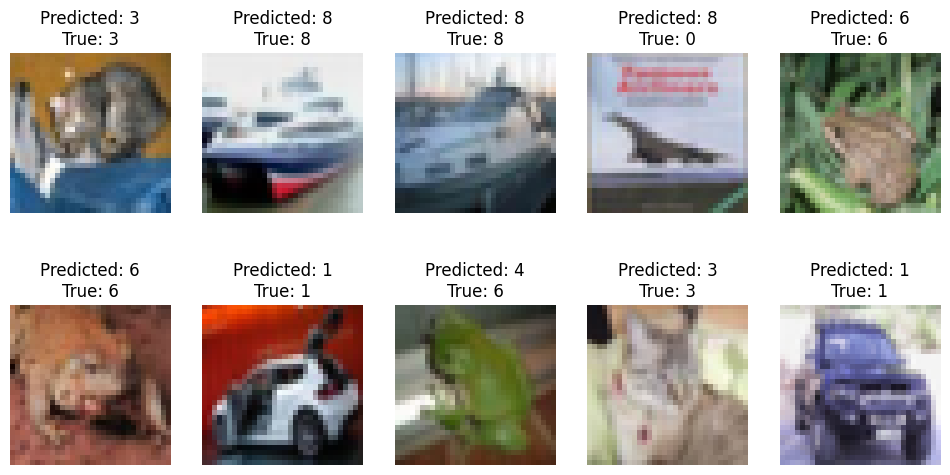

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Get the predictions for the first 10 images in the test set
predictions = model.predict(X_test[:10])

# Get the true labels for the first 10 images in the test set
true_labels = np.argmax(y_test[:10], axis=1)

# Create a grid of subplots to display the images and their predicted labels
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(12, 6))
for i, ax in enumerate(axes.flat):
    # Display the image
    ax.imshow(X_test[i])
    ax.axis('off')
    # Display the predicted label
    predicted_label = np.argmax(predictions[i])
    ax.set_title(f'Predicted: {predicted_label}\nTrue: {true_labels[i]}')
plt.show()


1/1 [==============================] - 0s 51ms/step


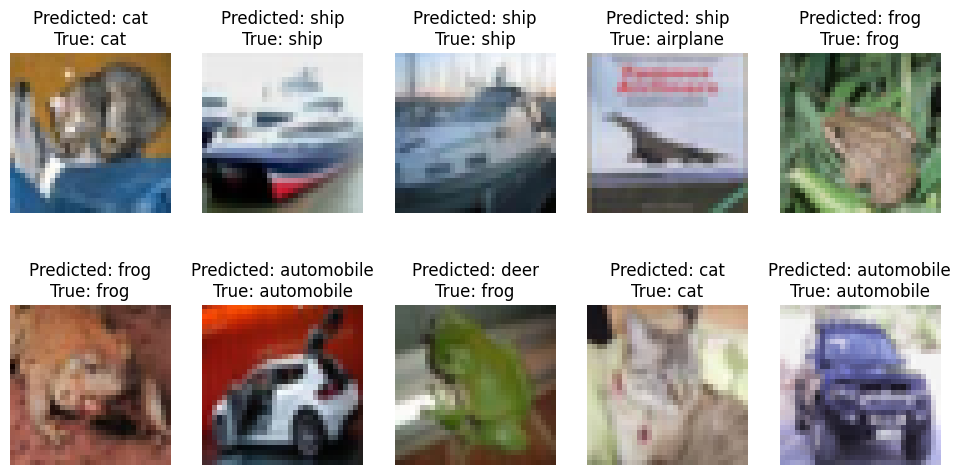

In [17]:
import pickle
import matplotlib.pyplot as plt
import numpy as np



# Load the label names from the CIFAR-10 website
label_names_url = 'https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz'
label_names_file = 'cifar-10-batches-py/batches.meta'

import urllib.request
urllib.request.urlretrieve(label_names_url, 'cifar-10-python.tar.gz')

import tarfile
with tarfile.open('cifar-10-python.tar.gz') as tar:
    tar.extract(label_names_file)
    
with open(label_names_file, 'rb') as f:
    label_names = pickle.load(f, encoding='bytes')

label_names = [name.decode('utf-8') for name in label_names[b'label_names']]


# Get the predictions for the first 10 images in the test set
predictions = model.predict(X_test[:10])

# Get the true labels for the first 10 images in the test set
true_labels = np.argmax(y_test[:10], axis=1)

# Create a grid of subplots to display the images and their predicted labels
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(12, 6))
for i, ax in enumerate(axes.flat):
    # Display the image
    ax.imshow(X_test[i])
    ax.axis('off')
    # Display the predicted and true label names
    predicted_label = np.argmax(predictions[i])
    predicted_name = label_names[predicted_label]
    true_name = label_names[true_labels[i]]
    ax.set_title(f'Predicted: {predicted_name}\nTrue: {true_name}')
plt.show()

1/1 [==============================] - 0s 30ms/step


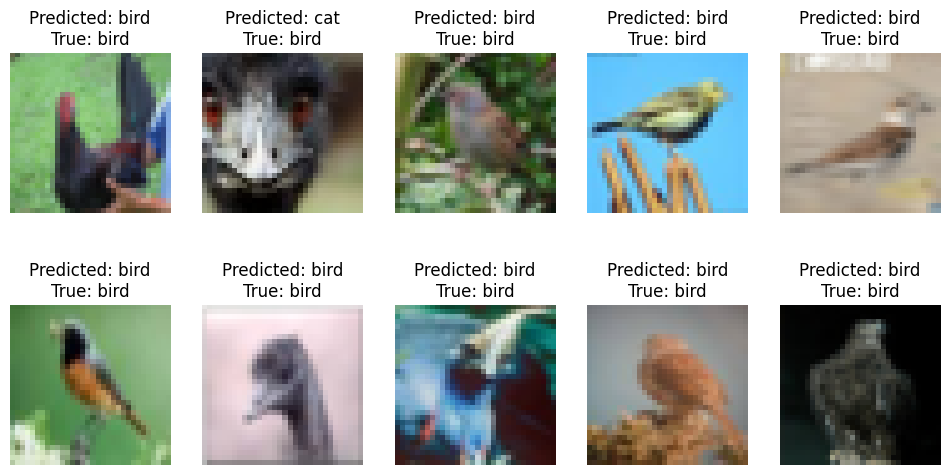

In [18]:
# Find indices of test images that are birds
bird_indices = np.where(y_test[:, 2] == 1)[0]

# Select the first 10 bird images from the test set
bird_images = X_test[bird_indices[:10]]

# Get the predictions for the bird images
bird_predictions = model.predict(bird_images)

# Get the true labels for the bird images
bird_true_labels = np.argmax(y_test[bird_indices[:10]], axis=1)

# Create a grid of subplots to display the bird images and their predicted labels
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(12, 6))
for i, ax in enumerate(axes.flat):
    # Display the bird image
    ax.imshow(bird_images[i])
    ax.axis('off')
    # Display the predicted label
    predicted_label = np.argmax(bird_predictions[i])
    ax.set_title(f'Predicted: {label_names[predicted_label]}\nTrue: {label_names[bird_true_labels[i]]}')
plt.show()



## **Confusion Matrix**


A confusion matrix is a table that is used to evaluate the performance of a classification model. It shows the number of correct and incorrect predictions made by the model compared to the actual outcomes.

313/313 [==============================] - 8s 27ms/step


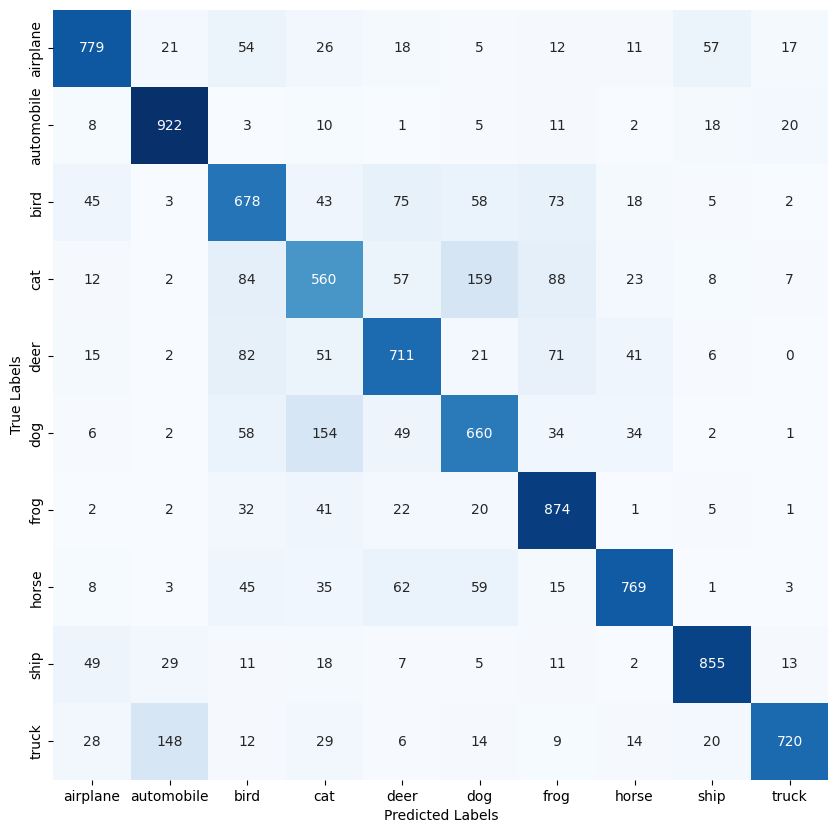

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Get the predictions for the test set
y_pred = np.argmax(model.predict(X_test), axis=-1)

# Get the true labels for the test set
y_true = np.argmax(y_test, axis=-1)

# Generate the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Define the class labels
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Plot the confusion matrix with colors
fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.heatmap(cm, annot=True, cmap='Blues', cbar=False, fmt='g', xticklabels=class_names, yticklabels=class_names)
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
plt.show()
